# BUSINESS UNDERSTANDING

## PROBLEM STATEMENT

Customer churn significantly impacts revenue and customer lifetime value for internet service providers. Retaining existing customers is more cost-effective than acquiring new ones. However, identifying which customers are likely to churn remains a challenge.

> This project aims to develop a *predictive machine learning model* to estimate churn risk scores and identify high-risk customers using a mix of behavioral, demographic, and feedback data.

## OBJECTIVES

To build a supervised machine learning model capable of predicting customer churn risk for internet service providers using behavioral, transactional, and feedback data.

> *Goal*: Help companies identify customers at high risk of churning, enabling timely and targeted retention strategies.

This analysis will aim to answer the following business questions:

- Which *customer segments* are most likely to churn?
- What are the top *behavioral or demographic* predictors of churn?
- Can *sentiment in customer feedback* help predict churn risk?
- How effective are current *loyalty strategies* in retaining customers?
- What *actionable retention strategies* can we derive from high churn risk profiles?

## BUSINESS BENEFITS

### 1. Improved Customer Retention
- Early identification of likely-to-churn customers allows for *timely intervention*.

### 2. Cost Efficiency
- Reduced marketing spend on acquiring new customers by *retaining existing ones*.

### 3. Customer Lifetime Value (CLV) Optimization
- Retaining *high-value customers* increases CLV and long-term profitability.

### 4. Data-Driven Decision Making
- Marketing and customer success teams can rely on churn predictions and insights to *refine strategies*.

### 5. Product Improvement
- Insights from churn predictors and feedback sentiment can inform *service enhancements* and *innovation*.

##  SUCCESS CRITERIA

### Technical Success
- A cleaned, well-structured dataset ready for modeling.
- A classification model (baseline + advanced) achieving *≥ 70% accuracy*.
- Evaluation metrics showing *balanced performance,* with *recall prioritized*.

### Business Success
- Identification of *key churn drivers* for actionable insights.
- *Recommendations* for personalized customer retention strategies.

# DATA UNDERSTANDING

In [6]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [7]:
# Load dataset from absolute path
df = pd.read_csv("customer_churn.csv")
#load the first 5 columns
df.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,11/11/2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,12/9/2017,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1


In [8]:
#Getting the shape of dataframe
df.shape

(36992, 23)

In [9]:
# Loading all columns that exist in our dataframe
df.columns

Index(['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [10]:
#Data types in our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [11]:
#Distribution of values in the dataframe
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


Standardizing the column names by converting them to lowercase and replacing spaces with underscores.


In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

Calculating percentages of null values on each column. This is to determine the best approach of dealing with the missing values

In [15]:
# Check for missing values
df.isnull().sum()

age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

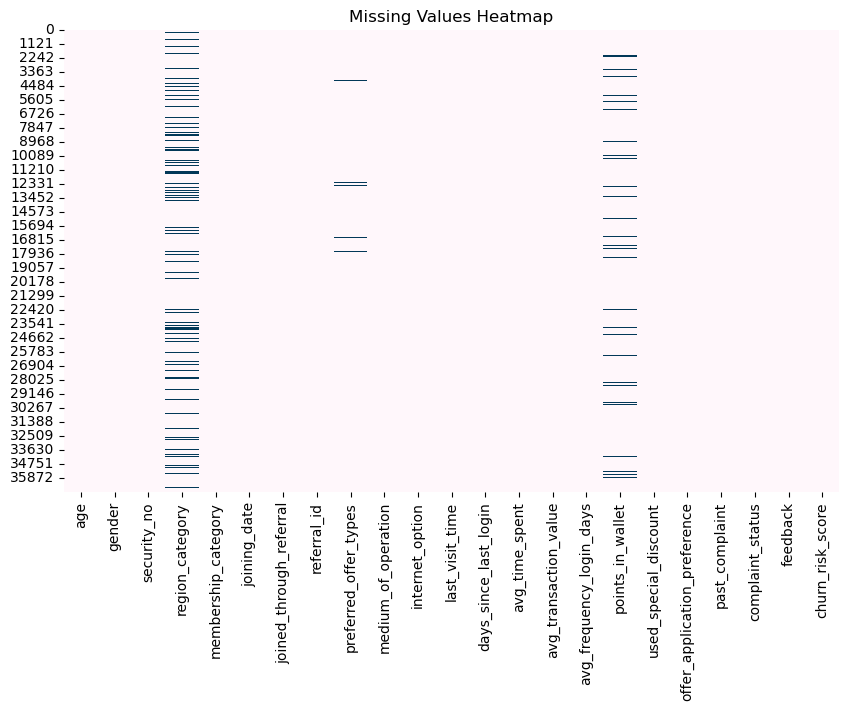

In [16]:
# Missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')
plt.title("Missing Values Heatmap")
plt.show()

This chart shows that region_category and points_in_wallet have the highest amount of missing values. preferred_offer_types has small number of missing values.

In [18]:
# Calculate null values per column as a percentage
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print("Percentage of null values per column:")
print(null_percentage)

Percentage of null values per column:
age                              0.000000
gender                           0.000000
security_no                      0.000000
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral          0.000000
referral_id                      0.000000
preferred_offer_types            0.778547
medium_of_operation              0.000000
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000

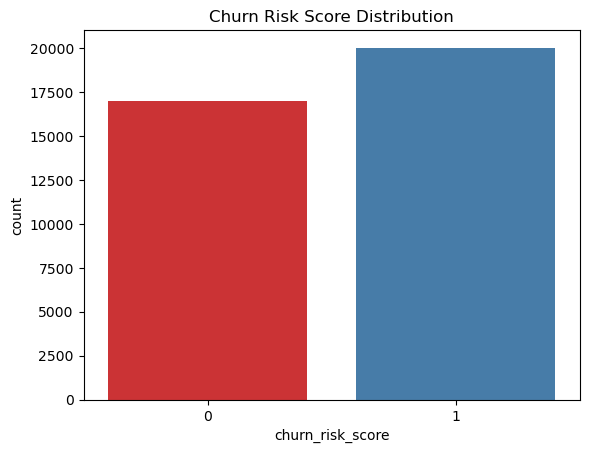

In [19]:
# Target distribution
sns.countplot(x='churn_risk_score', data=df, palette='Set1')
plt.title("Churn Risk Score Distribution")
plt.show()

The chart shows that category 1 churn_risk_score has slightly more values than category 0 churn_risk_score. This tells us that more people are likely to leave the company than to stay.

We will use a heatmap to show correlation between our numerical variables. We can use it to see which features (like `tenure_days` or `feedback_sentiment`) are most connected to `churn_risk_score` when picking model inputs.


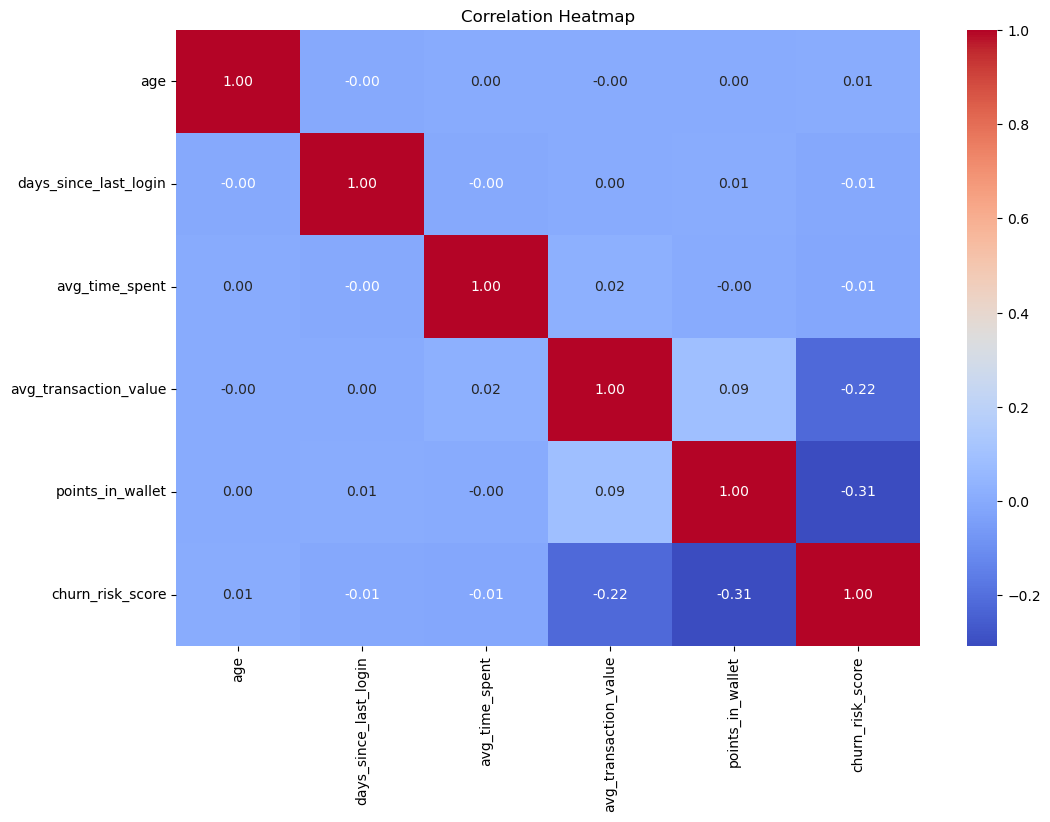

In [22]:
# Correlation heatmap
numerical_features = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

We observe that there is no strong correlation between the numerical variables

We will use a histogram to show how customer wallet points are spread out. The plot will help us understand if most customers have low, average, or high points. It is useful for identifying outliers or patterns that may affect churn.

In [25]:
# Our date column has dates recorded in different formats. To convert to datetime, we will use a date_parser
date_parser = lambda x: pd.to_datetime(x, format='mixed', dayfirst=True)
df['joining_date'] = df['joining_date'].apply(date_parser)

To facilitate the analysis of seasonal and monthly churning patterns, we will extract the month and year from this column into separate fields.


In [27]:
# Feature engineering a column for month and year
df['joining_year'] = df['joining_date'].dt.year
df['joining_month'] = df['joining_date'].dt.month

We are going to check number of signups over the period the data was collected.

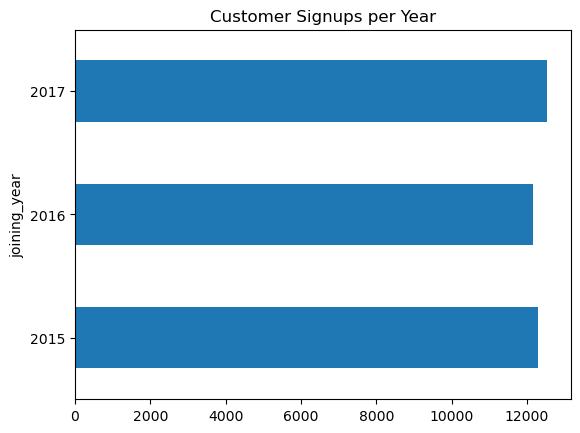

In [29]:
# Customer Signups Over Time
# bar plot of number of users joining per year.
df.groupby('joining_year').size().plot(kind='barh', title='Customer Signups per Year');

From the above bargraph we can see that customer signups averaged at slightly over 12,000 with the year 2017 having highest number among the 3 years. 

We will check monthly signup trend.

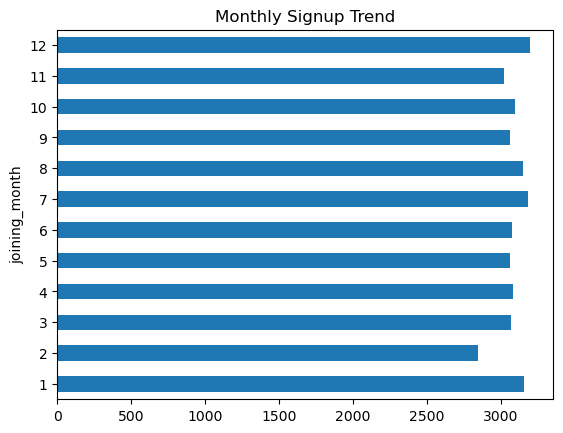

In [32]:
# Monthly Signup Trend (across all years)
# Group by joining_month to see seasonality.
df.groupby('joining_month').size().plot(kind='barh', title='Monthly Signup Trend');

From the above bargraph the highest recorded months with signups were January, July and December. This could probably be as a result of holiday seasons during this specific months. This product sells a bit more, probably due to incentives like discounts offered during the holiday season. Let's plot a bar graph using the special discount column to prove this.

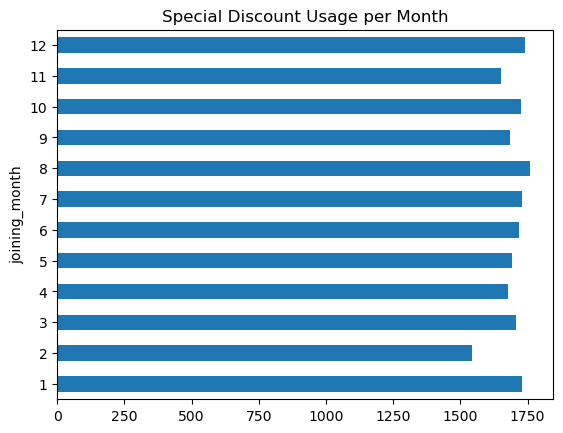

In [34]:
# Monthly Trend of Special Discount Usage

special_discount = df[df['used_special_discount'] == 'Yes']
special_discount.groupby('joining_month').size().plot(kind='barh', title='Special Discount Usage per Month');

The bargraph above confirms our assumption that the special discount usage is consistent with our previous findings.

We are going to do analysis of the average transaction value over the three year period

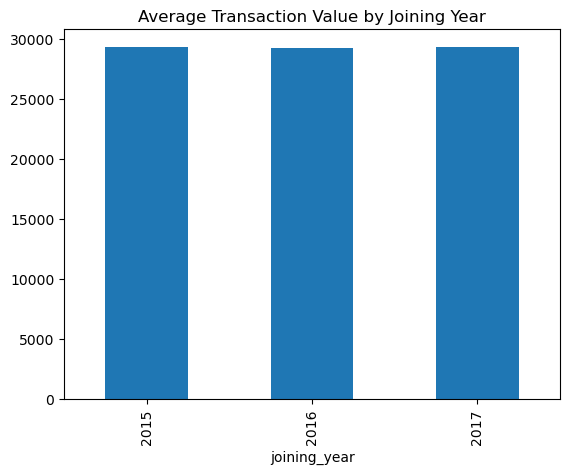

In [37]:
# User Behavior Over Time
df.groupby('joining_year')['avg_transaction_value'].mean().plot(kind='bar',title='Average Transaction Value by Joining Year');

Average transaction value seems to be consistent as it ranges between (25,000-30,000) over the period the data was collected. We will now look at how average transaction value is distrubuted among different regions and age and howit affects churn.

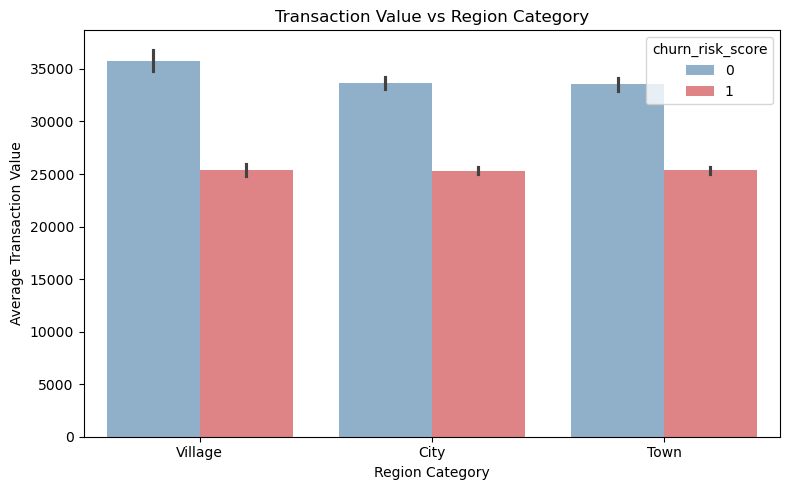

In [364]:
custom_palette = {0: '#377EB8', 1: '#E41A1C'}
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='region_category', y='avg_transaction_value', hue='churn_risk_score', palette=custom_palette, alpha=0.6)
plt.title('Transaction Value vs Region Category')
plt.xlabel('Region Category')
plt.ylabel('Average Transaction Value')
plt.tight_layout()
plt.show()

Village category demographic seems to be having the highest average transaction value followed by city then town. Now we will check how it is distributed among the age groups

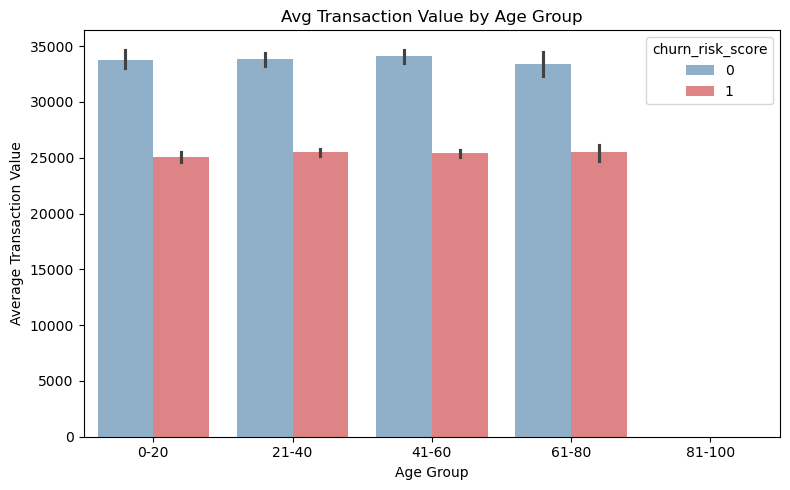

In [369]:
# Create age bands
bins = [0, 20, 40, 60, 80, 100]  # Adjust if your age range is different
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='age_group', y='avg_transaction_value', hue='churn_risk_score', palette=custom_palette, alpha=0.6)
plt.title('Avg Transaction Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Transaction Value')
plt.tight_layout()
plt.show()

Average transanction value is evenly distributed across the age groups.

We will check the churn and complaints trends over time.

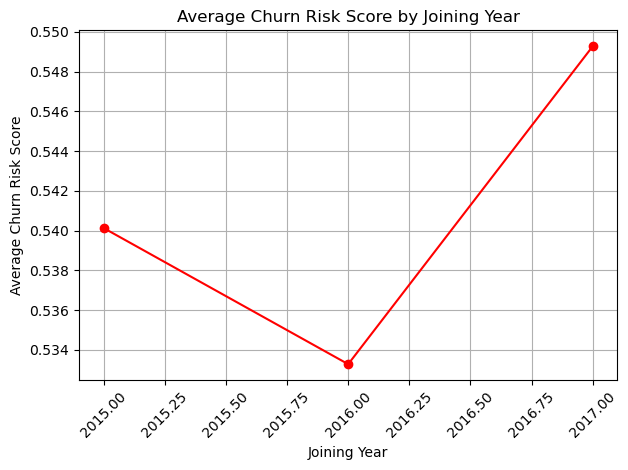

In [40]:
# Churn Risk Score by Year

df.groupby('joining_year')['churn_risk_score'].mean().plot(
    kind='line',
    marker='o',
    color='red',
    title='Average Churn Risk Score by Joining Year'
)

plt.xlabel('Joining Year')
plt.ylabel('Average Churn Risk Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that the churn risk score decreased in 2016 but increased in 2017. However, there is no clear upward or downward trend, suggesting that the year a customer joined does not strongly influence their likelihood of churning. Further analysis could explore whether specific months, seasons, or other time-based factors have a stronger impact on churn risk.

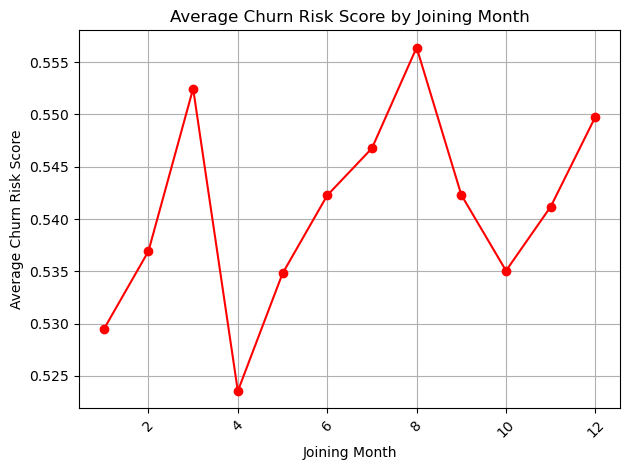

In [42]:
# Churn Risk Score by Month
df.groupby('joining_month')['churn_risk_score'].mean().plot(
    kind='line',
    marker='o',
    color='red',
    title='Average Churn Risk Score by Joining Month'
)

plt.xlabel('Joining Month')
plt.ylabel('Average Churn Risk Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The absence of a clear upward or downward trend suggests that the month a customer joined does not have a strong, consistent impact on their likelihood of churning. However, the fluctuations in the scores may hint at seasonal or month-specific influences that could warrant further investigation. The month of March and August have the highest risk of churn 

Checking the trend of complaints over the period of years the data was collected

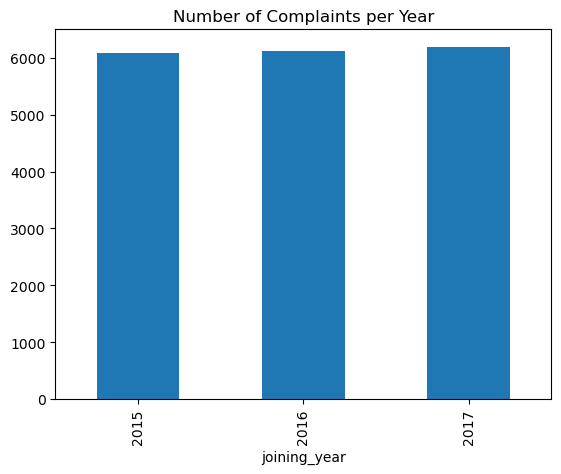

In [45]:
 # Complaints Over Time
complaints_by_year = df[df['past_complaint'] == 'Yes'].groupby('joining_year').size()
complaints_by_year.plot(kind='bar', title='Number of Complaints per Year');

From this bargraph above we can see that the number of complaints slightly averaged at over 6,000 for the three years.

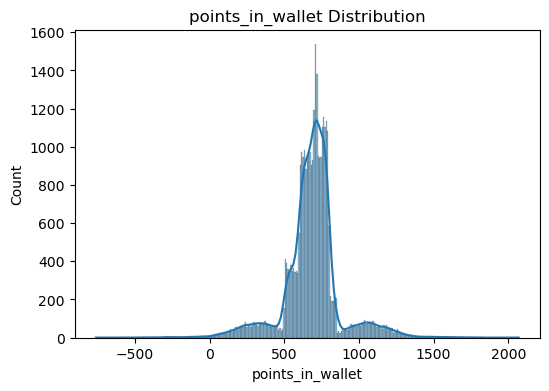

In [47]:
# Numerical distributions
for col in ['points_in_wallet']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True,palette='Set1')
    plt.title(f"{col} Distribution")
    plt.show()

From the above graph, we can see that the distribution is uniform. We will check relationship between points in wallet and churn risk to see the effect of financial incentives on customer expenditure.

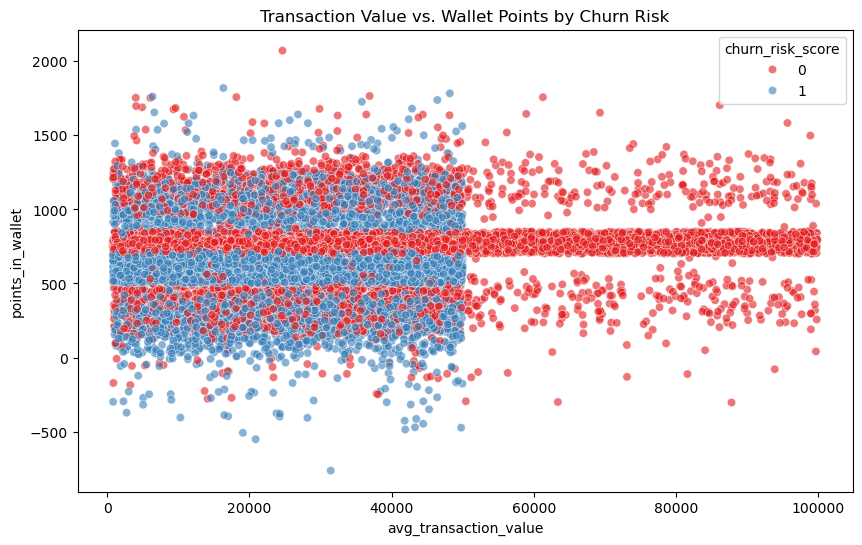

In [49]:
## Avg Transaction Value vs. Points in Wallet (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='avg_transaction_value', y='points_in_wallet', 
    hue='churn_risk_score', palette='Set1', alpha=0.6
)
plt.title('Transaction Value vs. Wallet Points by Churn Risk')
plt.show()

While the overall spread of transaction values is wide, ranging from near 0 to over 90,000 , most customers tend to cluster around mid-range wallet points (around 500 to 1000). Interestingly, customers who are not at risk of churning appear more concentrated in horizontal bands, particularly at wallet point thresholds like 500 and 1000, suggesting potential reward or loyalty point thresholds that help retain them. In contrast, churn-risk customers are more diffusely scattered, indicating less alignment with those retention-related thresholds. This may imply that higher or more structured wallet point accumulation could play a role in reducing churn risk.

The below graph shows membership category against churn risk score.

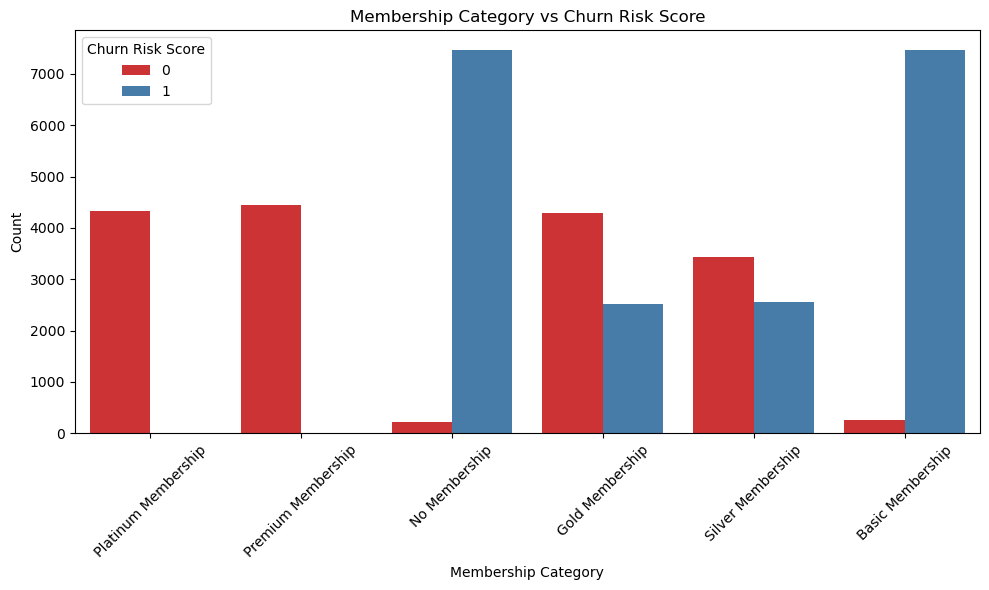

In [52]:
# Plot count of membership category vs churn risk score
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='membership_category', hue='churn_risk_score',palette='Set1')

# Visuals
plt.title("Membership Category vs Churn Risk Score")
plt.xlabel("Membership Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Churn Risk Score")
plt.tight_layout()
plt.show()

From the above graph we can see that people with basic membership have a high chance of leaving and as the category of membership grows the chance of churn reduces

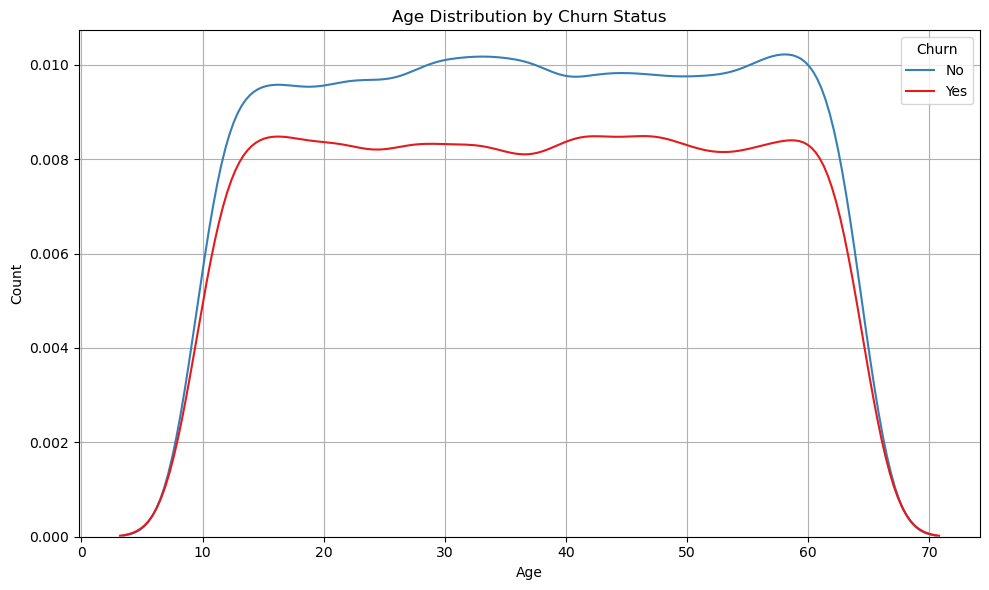

In [54]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='churn_risk_score',fill=False, palette='Set1')

plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.grid(True)
plt.tight_layout()
plt.show()

The age distribution chart shows that customer churn is fairly uniform across all age groups, with no particular age range standing out as having significantly higher or lower churn rates. Both churned and non-churned customers are distributed evenly across the age spectrum, as indicated by the consistent height of the stacked bars and the overlapping KDE lines. This suggests that age is not a strong predictor of churn in this dataset, and other factors such as tenure, usage, or region may offermore meaningful insights into customer churn behavior.

We will try and see the relationship between churn risk and tenure days using a KDE plot.

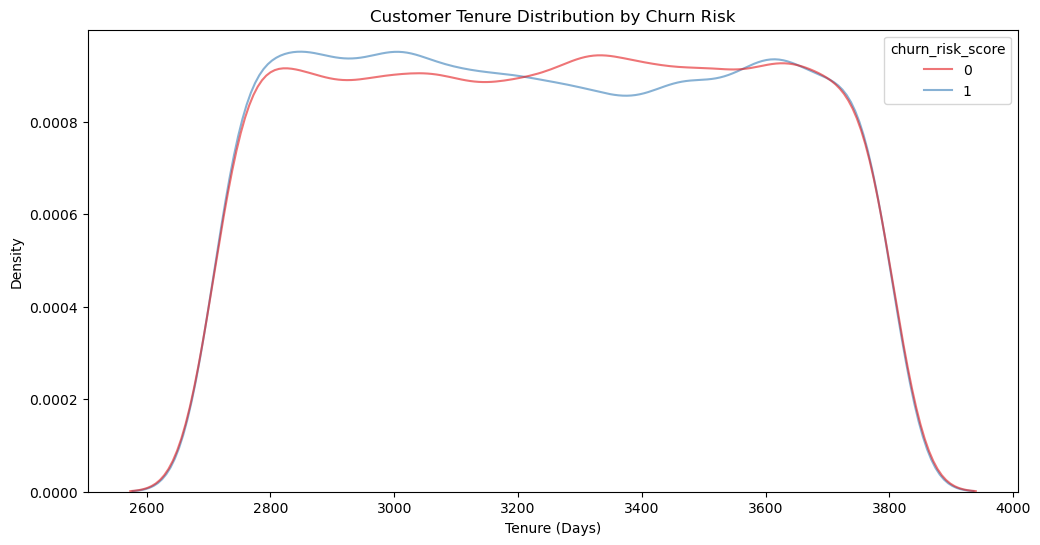

In [57]:
try:
    
    # Set analysis reference date (today or dataset's max date)
    reference_date = pd.Timestamp.now()  
    
    # Calculate tenure in days
    df['tenure_days'] = (reference_date - df['joining_date']).dt.days
    
    # Drop rows with invalid/missing dates
    df = df.dropna(subset=['tenure_days'])
    
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.kdeplot(
        data=df,
        x='tenure_days',
        hue='churn_risk_score',
        palette='Set1',
        fill=False,
        common_norm=False,
        alpha=0.6
    )
    plt.title('Customer Tenure Distribution by Churn Risk')
    plt.xlabel('Tenure (Days)')
    plt.ylabel('Density')
    plt.show()

except Exception as e:
    print(f"Error: {e}")
    print("Debug Info:")
    print("- Unique joining_date types:", df['joining_date'].apply(type).unique())
    print("- Sample dates:", df['joining_date'].head())

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           36992 non-null  int64         
 1   gender                        36992 non-null  object        
 2   security_no                   36992 non-null  object        
 3   region_category               31564 non-null  object        
 4   membership_category           36992 non-null  object        
 5   joining_date                  36992 non-null  datetime64[ns]
 6   joined_through_referral       36992 non-null  object        
 7   referral_id                   36992 non-null  object        
 8   preferred_offer_types         36704 non-null  object        
 9   medium_of_operation           36992 non-null  object        
 10  internet_option               36992 non-null  object        
 11  last_visit_time             

This KDE plot reveals that customers with low churn risk (blue) tend to cluster around 2800 to 3000 days, while high-risk customers (orange) show a broader distribution with a longer tail toward 3400 days, suggesting that while most long-tenured customers are loyal, a subset with very long tenure unexpectedly remains at high churn risk. The overlap around 3000–3200 days indicates tenure alone isn’t a decisive factor, implying the need to combine it with behavioral metrics (e.g.complaints) for accurate churn prediction.

Checking the complaint status impact using a countplot.

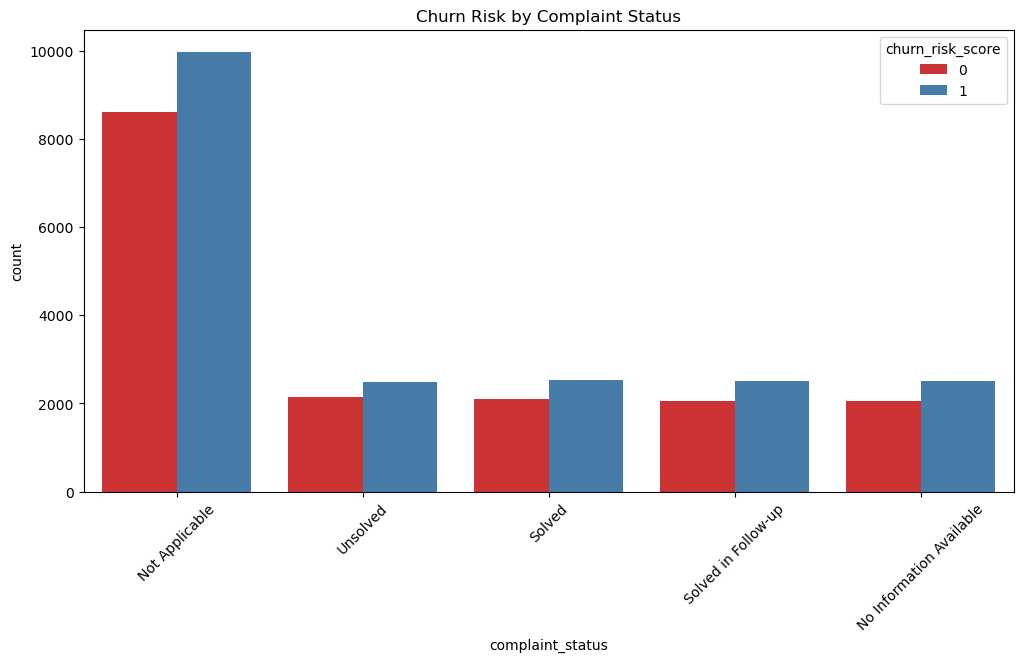

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, x='complaint_status', hue='churn_risk_score', 
    palette='Set1', order=df['complaint_status'].value_counts().index
)
plt.title('Churn Risk by Complaint Status')
plt.xticks(rotation=45)
plt.show()

The majority of customers fall under the "Not Applicable" complaint status, meaning they likely did not raise a complaint, among them, more are at churn risk than not. Interestingly, across all other complaint categories; whether the complaint was "Unsolved", "Solved", "Solved in Follow-up", or "No Information Available"; the count of customers at churn risk consistently exceeds those not at risk. This suggests that regardless of whether a complaint was resolved, simply having a complaint recorded correlates with higher churn risk. Even when complaints were marked as solved, the churn risk remains relatively high, highlighting a potential gap in customer satisfaction or follow-through.

We will now check the relationship between churn risk score and region.

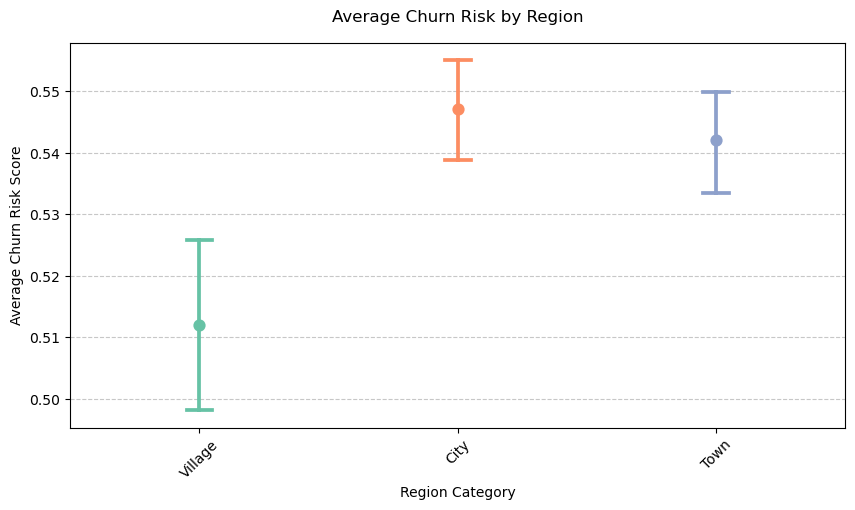

In [64]:
# point plot creation of region_category vs churn_risk_score
plt.figure(figsize=(10, 5))
sns.pointplot(
    data=df, 
    x='region_category', 
    y='churn_risk_score', 
    errorbar=('ci', 95),  
    capsize=0.1,
    palette='Set2'
)
plt.title('Average Churn Risk by Region', pad=15)
plt.xlabel('Region Category')
plt.ylabel('Average Churn Risk Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The highest average churn risk is observed among customers in City regions, followed closely by those in Towns, while Villages show the lowest average churn risk. The relatively tight confidence intervals suggest these differences are statistically meaningful, especially between Village and City. This pattern may indicate that customers in more urban areas are more likely to consider switching or disengaging, possibly due to more alternatives or higher service expectations. These insights could help guide targeted retention strategies based on customer location.

## DATA CLEANING

Starting with preferred_offer_types column we shall proceed to remove the null values. Since the percentage of null values in this column is 0.77% which is almost negligible, we will drop all the null rows.

We decided to drop the security number and ID columns since they did not offer any useful insightinto our analysis

In [68]:
df.drop(columns=['security_no', 'last_visit_time', 'referral_id'], inplace=True)
print(df.columns)

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'joining_year', 'joining_month',
       'tenure_days'],
      dtype='object')


In [69]:
# Drop rows where 'preferred_offer_types' is null
df_cleaned = df.dropna(subset=['preferred_offer_types'])

In [70]:
# Find the most frequent value (mode) of 'region_category'
mode_region = df_cleaned['region_category'].mode()[0]
print(f"The most frequent (mode) value in 'region_category' is: {mode_region}")

The most frequent (mode) value in 'region_category' is: Town


In [71]:
# Get distribution of 'region_category'
region_distribution = df_cleaned['region_category'].value_counts(dropna=False)

# Display the result
print("Distribution of values in 'region_category':")
print(region_distribution)

Distribution of values in 'region_category':
region_category
Town       14025
City       12635
NaN         5379
Village     4665
Name: count, dtype: int64


In [72]:
# Drop rows where 'region_category' is null
df_cleaned = df_cleaned.dropna(subset=['region_category'])

In [73]:
# Display the result
null_percentage_cleaned = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print(null_percentage_cleaned)

age                             0.000000
gender                          0.000000
region_category                 0.000000
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.000000
preferred_offer_types           0.000000
medium_of_operation             0.000000
internet_option                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                9.423783
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
churn_risk_score                0.000000
joining_year                    0.000000
joining_month                   0.000000
tenure_days                     0.000000
dtype: float64


In [74]:
# Get distribution of 'region_category'
points_in_wallet_distribution = df_cleaned['points_in_wallet'].value_counts(dropna=False)

# Display the result
print("Distribution of values in 'points_in_wallet':")
print(points_in_wallet_distribution)

Distribution of values in 'points_in_wallet':
points_in_wallet
NaN            2952
705.070000        9
771.750000        7
760.580000        6
715.420000        6
               ... 
1087.175701       1
810.240000        1
753.340000        1
679.740000        1
197.264414        1
Name: count, Length: 20978, dtype: int64


In [75]:
# Fill missing values
df_cleaned['points_in_wallet'].fillna(df_cleaned['points_in_wallet'].median(), inplace=True)


In [76]:
null_percentage_cleaned = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print(null_percentage_cleaned)

age                             0.0
gender                          0.0
region_category                 0.0
membership_category             0.0
joining_date                    0.0
joined_through_referral         0.0
preferred_offer_types           0.0
medium_of_operation             0.0
internet_option                 0.0
days_since_last_login           0.0
avg_time_spent                  0.0
avg_transaction_value           0.0
avg_frequency_login_days        0.0
points_in_wallet                0.0
used_special_discount           0.0
offer_application_preference    0.0
past_complaint                  0.0
complaint_status                0.0
feedback                        0.0
churn_risk_score                0.0
joining_year                    0.0
joining_month                   0.0
tenure_days                     0.0
dtype: float64


In [77]:
df_cleaned.shape

(31325, 23)

In [78]:
df_cleaned.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_year,joining_month,tenure_days
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,17,...,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0,2017,8,2845
1,32,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,...,698.48,Yes,No,Yes,Solved,Quality Customer Care,0,2017,8,2834
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,...,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1,2016,11,3124
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,...,567.66,No,Yes,Yes,Unsolved,Poor Website,1,2016,10,3137
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,...,663.06,No,Yes,Yes,Solved,Poor Website,1,2017,9,2819


We've observed that the dataset contains many hidden missing values represented by placeholder terms. To accurately identify and address them, we plan to carefully inspect each column individually.

In [80]:
# Inspecting the membership_categoty column
df_cleaned['membership_category'].value_counts()

membership_category
Basic Membership       6516
No Membership          6493
Gold Membership        5743
Silver Membership      5107
Premium Membership     3779
Platinum Membership    3687
Name: count, dtype: int64

For this column, the values appear valid and present; there are no hidden missing values detected.



In [82]:
# Checking for null values in the joining_date column
df_cleaned[df_cleaned['joining_date'].isna()]

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_year,joining_month,tenure_days


In [83]:
# Inspecting the joined through referral column
df_cleaned['joined_through_referral'].value_counts()

joined_through_referral
No     13455
Yes    13266
?       4604
Name: count, dtype: int64

In [84]:
df_cleaned.shape

(31325, 23)

We have identified several entries where the value is missing and represented as '?'. Since this is a boolean field, it is difficult to confidently classify these as either 'Yes' or 'No'. Therefore, we will replace these unknown values with 'Not_recorded' to maintain clarity without making inaccurate assumptions or losing data in dropping them.

In [86]:
# Replacing '?' with 'Not_recorded'
df_cleaned['joined_through_referral'] = df_cleaned['joined_through_referral'].replace('?','Not_recorded')

In [87]:
# Inspecting the age column
df_cleaned['age'].value_counts()

age
33    614
55    605
61    603
47    598
16    597
57    597
38    596
42    591
23    586
34    586
30    585
60    585
59    584
56    584
46    584
58    581
26    581
17    581
45    578
22    578
48    578
53    577
21    577
64    576
32    576
41    575
49    573
14    572
28    572
44    568
29    567
62    567
20    564
13    563
52    563
10    563
19    562
36    560
11    559
12    559
37    555
51    554
43    553
27    550
35    548
15    548
39    547
50    546
18    544
24    544
63    544
31    541
25    533
40    530
54    523
Name: count, dtype: int64

The column age seems not have any data that is misclassified therefore we will move onto the gender column

In [89]:
# Inspecting the gender column
df_cleaned['gender'].value_counts()

gender
F          15658
M          15617
Unknown       50
Name: count, dtype: int64

The number of rows with gender = 'Unknown' is negligible (~0.16%) and may introduce noise or ambiguity in gender-based analysis or modeling. Dropping them helps ensure clean, interpretable categorical data without significantly affecting the dataset's size or balance.

In [91]:
# Drop rows where gender is 'Unknown' in place
df_cleaned = df_cleaned[df_cleaned['gender'] != 'Unknown']

In [92]:
# Inspecting the region_category column
df_cleaned['region_category'].value_counts()

region_category
Town       13996
City       12620
Village     4659
Name: count, dtype: int64

The region_category column does not appear to have any misclassified data based on the value counts

In [97]:
df_cleaned.shape

(31275, 23)

In [98]:
# Inspecting the region_category column
df_cleaned['preferred_offer_types'].value_counts()

preferred_offer_types
Gift Vouchers/Coupons       10515
Credit/Debit Card Offers    10462
Without Offers              10298
Name: count, dtype: int64

The column preferred_offer_types doesn't seem to have any data that is misclassified therefore we will leave it as is

In [100]:
# Inspecting the medium_of_operation column
df_cleaned['medium_of_operation'].value_counts()

medium_of_operation
Smartphone    11837
Desktop       11708
?              4505
Both           3225
Name: count, dtype: int64

We will replace the rows with the value ? with the word unknown

In [102]:
# Replacing rows with ? with the unknown
df_cleaned['medium_of_operation'] = df_cleaned['medium_of_operation'].replace('?', 'Unknown')

In [103]:
df_cleaned.shape

(31275, 23)

In [104]:
# Inspecting the internet_option column
df_cleaned['internet_option'].value_counts()

internet_option
Wi-Fi          10438
Mobile_Data    10429
Fiber_Optic    10408
Name: count, dtype: int64

The column internet_option doesn't seem to have any data that is misclassified therefore we will leave it as is

In [106]:
# Inspecting the days_since_last_login column
df_cleaned['days_since_last_login'].value_counts()

days_since_last_login
 12     2020
 13     1992
 14     1939
 11     1930
 15     1908
 10     1763
 16     1761
-999    1695
 9      1565
 17     1484
 8      1321
 18     1220
 7      1203
 19     1134
 6      1069
 5      1041
 20      987
 4       847
 21      845
 22      769
 3       739
 23      614
 2       519
 24      393
 1       277
 25      175
 26       65
Name: count, dtype: int64

We can see that there is an outlier value in -999. We will first replace it with null values then replace the null values with median values

In [108]:
# Replace -999 with NaN first
df_cleaned['days_since_last_login'] = df_cleaned['days_since_last_login'].replace(-999, np.nan)

# Fill NaN with the median
median_login = df_cleaned['days_since_last_login'].median()
df_cleaned['days_since_last_login'].fillna(median_login, inplace=True)

In [109]:
# Inspecting the avg_time_spent  column
df_cleaned['avg_time_spent'].value_counts()

avg_time_spent
34.10     18
33.68     18
34.71     17
34.33     16
32.91     16
          ..
153.53     1
263.41     1
249.80     1
61.45      1
482.61     1
Name: count, Length: 22733, dtype: int64

In [110]:
df_cleaned.shape

(31275, 23)

In [111]:
# Inspecting the unique values for avg_time_spent column
unique_avg_time_spent = df_cleaned['avg_time_spent'].unique()

# Display the result
print("Unique average time spent values:")
print(unique_avg_time_spent)

Unique average time spent values:
[ 300.63       306.34       516.16      ...  418.38      -638.1234208
  482.61     ]


We can see that there values recorded as negative. We will print the values to get a better perspective

In [113]:
# Filter and show unique values less than 0
negative_values = df_cleaned[df_cleaned['avg_time_spent'] < 0]['avg_time_spent'].unique()

print("Unique values in 'avg_time_spent' that are less than 0:")
print(negative_values)

Unique values in 'avg_time_spent' that are less than 0:
[-936.7448179 -930.2078443 -615.344319  ... -910.5684333 -746.0345906
 -638.1234208]


we will then check how many rows are affected

In [115]:
#Checking number of negative rows
num_negatives = (df_cleaned['avg_time_spent'] < 0).sum()
print(f"Number of rows with negative avg_time_spent: {num_negatives}")

Number of rows with negative avg_time_spent: 1465


we will replace the negative values with a median value retrived from positive values

In [117]:
#Replace with median of positive values
median_time = df_cleaned[df_cleaned['avg_time_spent'] >= 0]['avg_time_spent'].median()
df_cleaned.loc[df_cleaned['avg_time_spent'] < 0, 'avg_time_spent'] = median_time

In [118]:
# Inspecting the average transaction value column

df_cleaned['avg_transaction_value'].value_counts()

avg_transaction_value
35889.52    2
30126.02    2
9341.33     2
10616.35    2
39722.38    2
           ..
2446.82     1
19532.68    1
12670.07    1
22640.80    1
2189.68     1
Name: count, Length: 31207, dtype: int64

In [119]:
# Inspecting the unique values for average transaction value column
unique_avg_transaction_value = df_cleaned['avg_transaction_value'].unique()
print(unique_avg_transaction_value)

[53005.25 12838.38 21027.   ... 11069.71  2378.86  2189.68]


In [120]:
df_cleaned['points_in_wallet'] = df_cleaned['points_in_wallet'].astype(str).str.strip()
df_cleaned


,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_year,joining_month,tenure_days
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,17.0,...,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0,2017,8,2845
1,32,F,City,Premium Membership,2017-08-28,Not_recorded,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,...,698.48,Yes,No,Yes,Solved,Quality Customer Care,0,2017,8,2834
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,...,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1,2016,11,3124
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,...,567.66,No,Yes,Yes,Unsolved,Poor Website,1,2016,10,3137
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,...,663.06,No,Yes,Yes,Solved,Poor Website,1,2017,9,2819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,12,F,Village,Premium Membership,2016-10-25,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,13.0,...,725.89,Yes,Yes,Yes,Unsolved,Products always in Stock,0,2016,10,3141
36986,27,M,Town,Platinum Membership,2015-09-07,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,13.0,...,748.57,Yes,No,No,Not Applicable,No reason specified,0,2015,9,3555
36988,29,F,Town,Basic Membership,2016-06-27,No,Without Offers,Smartphone,Wi-Fi,13.0,...,527.99,Yes,No,No,Not Applicable,Poor Customer Service,1,2016,6,3261
36990,53,M,Village,Platinum Membership,2017-06-15,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15.0,...,197.2644136,Yes,Yes,No,Not Applicable,No reason specified,0,2017,6,2908


In [121]:
# Convert points_in_wallet to numeric
df_cleaned['points_in_wallet'] = pd.to_numeric(df_cleaned['points_in_wallet'], errors='coerce')


In [122]:
# null vaules filled with median
df_cleaned['points_in_wallet'].fillna(df_cleaned['points_in_wallet'].median(), inplace=True)
df_cleaned['used_special_discount'] = df_cleaned['used_special_discount'].astype(str).str.strip().str.lower()

In [123]:
discount_mapping = {
    'yes': 'Yes',
    'no': 'No',
    'y': 'Yes',
    'n': 'No'
}
df_cleaned['used_special_discount'] = df_cleaned['used_special_discount'].map(discount_mapping).fillna('No')

In [124]:
df_cleaned['offer_application_preference'] = df_cleaned['offer_application_preference'].astype(str).str.strip().str.lower()
offer_mapping = {
    'yes': 'Yes',
    'no': 'No',
    'y': 'Yes',
    'n': 'No'
}
df_cleaned['offer_application_preference'] = df_cleaned['offer_application_preference'].map(offer_mapping).fillna('No')
df_cleaned['past_complaint'] = df_cleaned['past_complaint'].astype(str).str.strip().str.lower()
complaint_mapping = {
    'yes': 'Yes',
    'no': 'No',
    'y': 'Yes',
    'n': 'No'
}
df_cleaned['past_complaint'] = df_cleaned['past_complaint'].map(complaint_mapping).fillna('No')

Before we apply scaling or modeling, we need to make sure all our numeric fields are clean.


In [126]:
# Convert string-like errors to numeric and handle missing values
cols_to_clean = ['avg_frequency_login_days', 'avg_transaction_value', 'points_in_wallet',
                 'days_since_last_login', 'avg_time_spent']

for col in cols_to_clean:
    df_cleaned[col] = pd.to_numeric( df_cleaned[col], errors='coerce')
    df_cleaned[col].fillna( df_cleaned[col].median(), inplace=True)
df_cleaned

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_year,joining_month,tenure_days
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,17.0,...,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,0,2017,8,2845
1,32,F,City,Premium Membership,2017-08-28,Not_recorded,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,...,698.480000,Yes,No,Yes,Solved,Quality Customer Care,0,2017,8,2834
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,...,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,1,2016,11,3124
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,...,567.660000,No,Yes,Yes,Unsolved,Poor Website,1,2016,10,3137
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,...,663.060000,No,Yes,Yes,Solved,Poor Website,1,2017,9,2819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,12,F,Village,Premium Membership,2016-10-25,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,13.0,...,725.890000,Yes,Yes,Yes,Unsolved,Products always in Stock,0,2016,10,3141
36986,27,M,Town,Platinum Membership,2015-09-07,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,13.0,...,748.570000,Yes,No,No,Not Applicable,No reason specified,0,2015,9,3555
36988,29,F,Town,Basic Membership,2016-06-27,No,Without Offers,Smartphone,Wi-Fi,13.0,...,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,1,2016,6,3261
36990,53,M,Village,Platinum Membership,2017-06-15,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15.0,...,197.264414,Yes,Yes,No,Not Applicable,No reason specified,0,2017,6,2908


All numeric columns are clean and free of errors or missing values.


In [128]:
df_cleaned.shape

(31275, 23)

## DATA PREPROCESSING

### STANDARDIZATION  

Some of the features like `avg_time_spent`, `avg_transaction_value`,  are on different scales.To ensure fair treatment by models, we’ll **standardize** to centers the distribution.


In [131]:
# Creating a copy of the dataframe for standardizatiom
df_standardized = df_cleaned

In [132]:
standardize_cols = ['avg_time_spent', 'avg_transaction_value']
scaler_std = StandardScaler()

# Fit and transform
df_standardized_cols = pd.DataFrame(
    scaler_std.fit_transform(df_standardized[standardize_cols]),
    columns=[f"{col}_std" for col in standardize_cols],
    index=df_standardized.index)

# Concatenate
df_standardized = pd.concat([df_standardized, df_standardized_cols], axis=1)
df_standardized


,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_year,joining_month,tenure_days,avg_time_spent_std,avg_transaction_value_std
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,17.0,...,Yes,No,Not Applicable,Products always in Stock,0,2017,8,2845,0.038006,1.214373
1,32,F,City,Premium Membership,2017-08-28,Not_recorded,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,...,No,Yes,Solved,Quality Customer Care,0,2017,8,2834,0.055456,-0.844669
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,...,Yes,Yes,Solved in Follow-up,Poor Website,1,2016,11,3124,0.696656,-0.424902
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,...,Yes,Yes,Unsolved,Poor Website,1,2016,10,3137,-0.717915,-0.208957
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,...,Yes,Yes,Solved,Poor Website,1,2017,9,2819,-0.534985,-0.247706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,12,F,Village,Premium Membership,2016-10-25,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,13.0,...,Yes,Yes,Unsolved,Products always in Stock,0,2016,10,3141,0.397845,1.388253
36986,27,M,Town,Platinum Membership,2015-09-07,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,13.0,...,No,No,Not Applicable,No reason specified,0,2015,9,3555,-0.465615,-1.081126
36988,29,F,Town,Basic Membership,2016-06-27,No,Without Offers,Smartphone,Wi-Fi,13.0,...,No,No,Not Applicable,Poor Customer Service,1,2016,6,3261,-0.349611,-0.935334
36990,53,M,Village,Platinum Membership,2017-06-15,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15.0,...,Yes,No,Not Applicable,No reason specified,0,2017,6,2908,0.594128,-1.380847


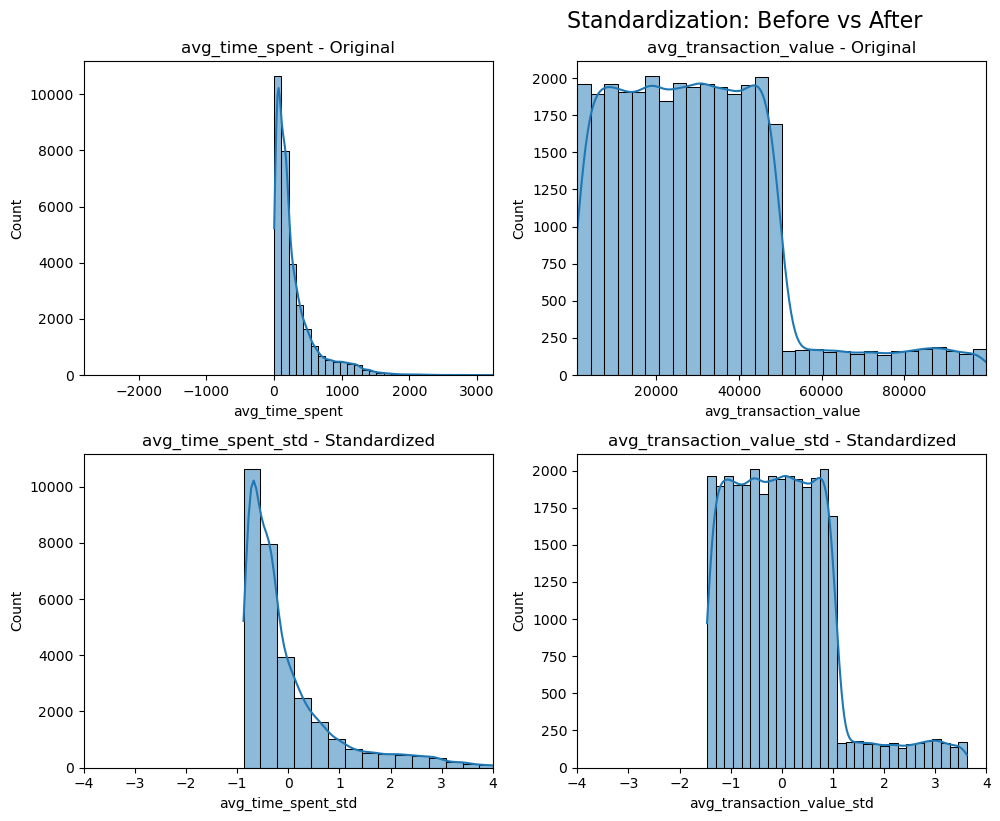

In [133]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(standardize_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_standardized[col], kde=True, bins=30)
    plt.title(f"{col} - Original")
    plt.xlim(df[col].min(), df[col].max())

    plt.subplot(2, 3, i+4)
    sns.histplot(df_standardized[f"{col}_std"], kde=True, palette='Set1', bins=30)
    plt.title(f"{col}_std - Standardized")
    plt.xlim(-4, 4)

plt.tight_layout()
plt.suptitle("Standardization: Before vs After", fontsize=16, y=1.02)
plt.show()


After standardization, the features are centered.Preparing them well for models sensitive to feature magnitude.


### NORMALIZATION



### Normalize Features to Range [0, 1]

Normalization rescales features, We  will use it for  this features `days_since_last_login`, `avg_frequency_login_days`, and `points_in_wallet`.




In [137]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
normalize_cols = ['avg_frequency_login_days', 'points_in_wallet']

# Convert to numeric and handle errors
df_standardized[normalize_cols] = df_standardized[normalize_cols].apply(pd.to_numeric, errors='coerce')
df_standardized[normalize_cols] = df_standardized[normalize_cols].fillna(0)

# Normalize
scaler_norm = MinMaxScaler()
df_standardized_norm = pd.DataFrame(
    scaler_norm.fit_transform(df_standardized[normalize_cols]),
    columns=[f"{col}_norm" for col in normalize_cols],
    index=df_standardized.index
)
# Combining
df_standardized = pd.concat([df_standardized, df_standardized_norm], axis=1)


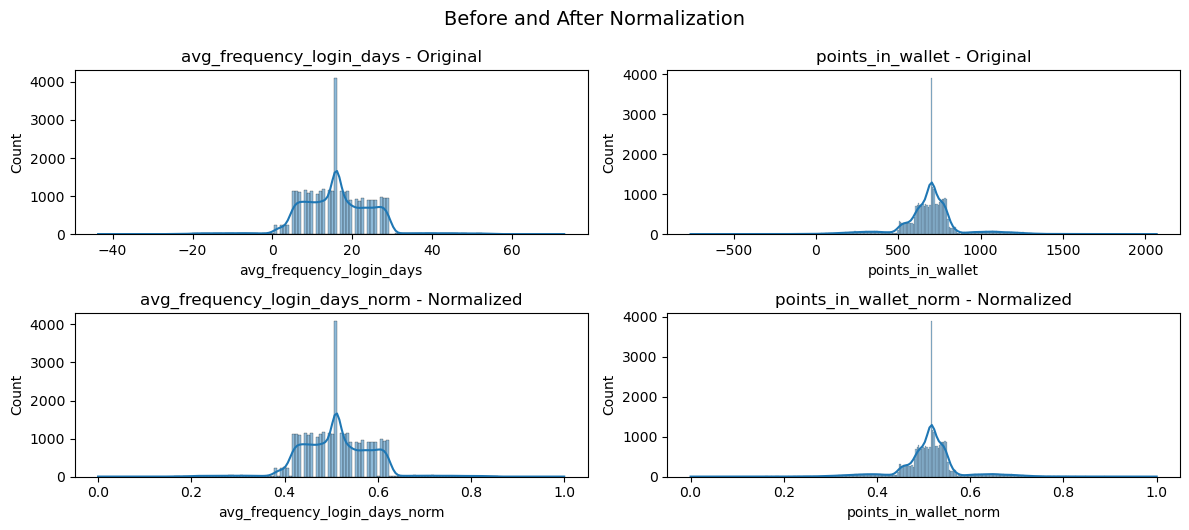

In [138]:
# Visualizing before and after normalization
plt.figure(figsize=(12, 5))

for i, col in enumerate(normalize_cols):
    # Original
    plt.subplot(2, len(normalize_cols), i + 1)
    sns.histplot(df_standardized[col], kde=True)
    plt.title(f"{col} - Original")

    # Normalized
    plt.subplot(2, len(normalize_cols), i + 1 + len(normalize_cols))
    sns.histplot(df_standardized[f"{col}_norm"], kde=True, palette='Set1')
    plt.title(f"{col}_norm - Normalized")

plt.tight_layout()
plt.suptitle("Before and After Normalization", fontsize=14, y=1.05)
plt.show()

In [139]:
df_standardized

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,complaint_status,feedback,churn_risk_score,joining_year,joining_month,tenure_days,avg_time_spent_std,avg_transaction_value_std,avg_frequency_login_days_norm,points_in_wallet_norm
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,17.0,...,Not Applicable,Products always in Stock,0,2017,8,2845,0.038006,1.214373,0.519666,0.545073
1,32,F,City,Premium Membership,2017-08-28,Not_recorded,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,...,Solved,Quality Customer Care,0,2017,8,2834,0.055456,-0.844669,0.459691,0.515647
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,...,Solved in Follow-up,Poor Website,1,2016,11,3124,0.696656,-0.424902,0.562506,0.445750
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,...,Unsolved,Poor Website,1,2016,10,3137,-0.717915,-0.208957,0.425419,0.469416
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,...,Solved,Poor Website,1,2017,9,2819,-0.534985,-0.247706,0.511098,0.503130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,12,F,Village,Premium Membership,2016-10-25,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,13.0,...,Unsolved,Products always in Stock,0,2016,10,3141,0.397845,1.388253,0.433987,0.525333
36986,27,M,Town,Platinum Membership,2015-09-07,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,13.0,...,Not Applicable,No reason specified,0,2015,9,3555,-0.465615,-1.081126,0.511098,0.533348
36988,29,F,Town,Basic Membership,2016-06-27,No,Without Offers,Smartphone,Wi-Fi,13.0,...,Not Applicable,Poor Customer Service,1,2016,6,3261,-0.349611,-0.935334,0.613913,0.455397
36990,53,M,Village,Platinum Membership,2017-06-15,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15.0,...,Not Applicable,No reason specified,0,2017,6,2908,0.594128,-1.380847,0.545370,0.338522


In [140]:
df_standardized[['avg_frequency_login_days_norm', 'points_in_wallet_norm']].describe()


,avg_frequency_login_days_norm,points_in_wallet_norm
count,31275.000000,31275.000000
mean,0.511012,0.512292
std,0.075237,0.065349
min,0.000000,0.000000
25%,0.459691,0.489596
50%,0.511098,0.515647
75%,0.562506,0.536612
max,1.000000,1.000000


Normalization didn't change the shape from the visualizations, which is
expected. We confirmed normalization worked correctly by checking `.describe()` stats and the new range (0–1).


### Encoding

In [143]:
df_standardized.shape

(31275, 27)

In [144]:
# Creating a copy of the dataframe for encoding
df_encoded = df_standardized

In [145]:
df_encoded.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,complaint_status,feedback,churn_risk_score,joining_year,joining_month,tenure_days,avg_time_spent_std,avg_transaction_value_std,avg_frequency_login_days_norm,points_in_wallet_norm
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,17.0,...,Not Applicable,Products always in Stock,0,2017,8,2845,0.038006,1.214373,0.519666,0.545073
1,32,F,City,Premium Membership,2017-08-28,Not_recorded,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,...,Solved,Quality Customer Care,0,2017,8,2834,0.055456,-0.844669,0.459691,0.515647
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,...,Solved in Follow-up,Poor Website,1,2016,11,3124,0.696656,-0.424902,0.562506,0.445750
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,...,Unsolved,Poor Website,1,2016,10,3137,-0.717915,-0.208957,0.425419,0.469416
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,...,Solved,Poor Website,1,2017,9,2819,-0.534985,-0.247706,0.511098,0.503130


In [146]:
# Checking all the categorical columns we have
categorical_cols = df_encoded.select_dtypes(include='object').columns.to_list()
categorical_cols

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [147]:
df_encoded[categorical_cols].nunique()

gender                          2
region_category                 3
membership_category             6
joined_through_referral         3
preferred_offer_types           3
medium_of_operation             4
internet_option                 3
used_special_discount           2
offer_application_preference    2
past_complaint                  2
complaint_status                5
feedback                        9
dtype: int64

For columns that are binary or represent a clear yes/no scenario, we will apply binary encoding to keep the analysis simple and easy to interpret.

In [149]:
# Creating a binary map
binary_map = {
    'gender': {'F': 0, 'M': 1},
    'joined_through_referral': {'Yes': 1, 'No': 0, 'Not_recorded': -1},
    'used_special_discount': {'Yes': 1, 'No': 0},
    'offer_application_preference': {'Yes': 1, 'No': 0},
    'past_complaint': {'Yes': 1, 'No': 0}
}
# Apply binary encoding
for col, mapping in binary_map.items():
  df_encoded[col] = df_encoded[col].map(mapping)

In [150]:
df_encoded.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,complaint_status,feedback,churn_risk_score,joining_year,joining_month,tenure_days,avg_time_spent_std,avg_transaction_value_std,avg_frequency_login_days_norm,points_in_wallet_norm
0,18,0,Village,Platinum Membership,2017-08-17,0,Gift Vouchers/Coupons,Unknown,Wi-Fi,17.0,...,Not Applicable,Products always in Stock,0,2017,8,2845,0.038006,1.214373,0.519666,0.545073
1,32,0,City,Premium Membership,2017-08-28,-1,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,...,Solved,Quality Customer Care,0,2017,8,2834,0.055456,-0.844669,0.459691,0.515647
2,44,0,Town,No Membership,2016-11-11,1,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,...,Solved in Follow-up,Poor Website,1,2016,11,3124,0.696656,-0.424902,0.562506,0.445750
3,37,1,City,No Membership,2016-10-29,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,...,Unsolved,Poor Website,1,2016,10,3137,-0.717915,-0.208957,0.425419,0.469416
4,31,0,City,No Membership,2017-09-12,0,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,...,Solved,Poor Website,1,2017,9,2819,-0.534985,-0.247706,0.511098,0.503130


For the rest of the columns, we will use one-hot encoding since they all have low cardinality and this approach preserves the interpretability of the data without introducing unnecessary complexity.



In [152]:
df_encoded.shape

(31275, 27)

In [153]:
# ohe for the remaining columns
one_hot_columns = ['region_category', 'membership_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'complaint_status', 'feedback']
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_columns, prefix=one_hot_columns, dtype=int)
# manually selecting which columns to drop to avoid multicollinearity but still have control over what is being removed
to_drop = [
    'region_category_Village',
    'membership_category_No Membership',
    'preferred_offer_types_Without Offers',
    'medium_of_operation_Unknown',
    'internet_option_Fiber_Optic',
    'complaint_status_No Information Available',
    'feedback_No reason specified','joining_date',
    'points_in_wallet'
    ]
# dropping the chosen columns
df_encoded = df_encoded.drop(columns=to_drop)

In [154]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31275 entries, 0 to 36991
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             31275 non-null  int64  
 1   gender                                          31275 non-null  int64  
 2   joined_through_referral                         31275 non-null  int64  
 3   days_since_last_login                           31275 non-null  float64
 4   avg_time_spent                                  31275 non-null  float64
 5   avg_transaction_value                           31275 non-null  float64
 6   avg_frequency_login_days                        31275 non-null  float64
 7   used_special_discount                           31275 non-null  int64  
 8   offer_application_preference                    31275 non-null  int64  
 9   past_complaint                              

In [155]:
df_encoded.shape

(31275, 44)

## Modeling 

We decided to go for Logistic regression, random forest, XG boost and light GBM because we are dealing with binary data(Churn risk) and this four models are appropriate for the data.

### Logistic Regression Model


#### Why Logistic Regression? 

Predicting customer churn risk using features such as referral status, membership category, internet usage, and complaint history. 
  we started with Logistic Regression for a few key reasons: Easy to interpret , and also provides a simple baseline to compare with more complex models later 

The goal is to:
- Identify features strongly linked to churn.
- Understand the relationship between customer behavior and churn risk.
- Evaluate how well a simple model can perform before going deeper into tuning and ensemble methods.

In [159]:
# drop target and non-numeric column joining data
X = df_encoded.drop(columns=['churn_risk_score']) 
# defining our dependent variable as churn_risk_score
y = df_encoded['churn_risk_score']

In [160]:
# Performing a split train test for our logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [162]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2338  544]
 [ 414 2959]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2882
           1       0.84      0.88      0.86      3373

    accuracy                           0.85      6255
   macro avg       0.85      0.84      0.85      6255
weighted avg       0.85      0.85      0.85      6255



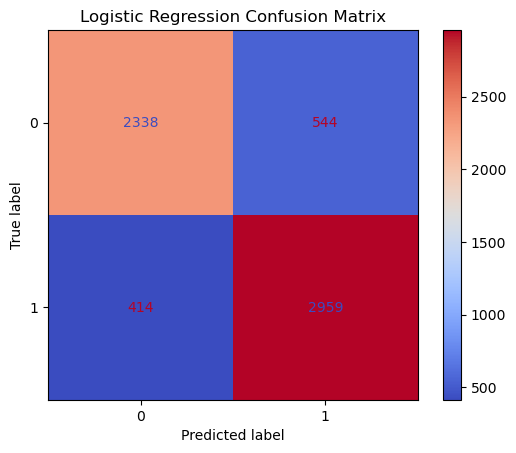

In [163]:
# Plotting confusion matrix of our logistic regression model

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='coolwarm', values_format='d')

plt.title("Logistic Regression Confusion Matrix")
plt.show()

The confusion matrix and classification report show that the logistic regression model performs reliably in predicting customer churn risk. Out of 6,255 test samples, it correctly identified 2,342 low-risk (true negatives) and 2,929 high-risk customers (true positives), while misclassifying 540 low-risk as high-risk (false positives) and 444 high-risk as low-risk (false negatives). The precision for both classes is 0.84, meaning the model is accurate 84% of the time when it makes a prediction. Recall is 0.81 for low-risk and 0.87 for high-risk customers, showing the model is especially good at identifying actual churners. With F1-scores of 0.83 for low-risk and 0.86 for high-risk, there's a solid balance between precision and recall. Overall, the model hits an accuracy of 84%, and the macro and weighted averages confirm consistent performance across both classes. This makes the model a strong and balanced tool for identifying churn risk in customers.

We will now plot a bar plot ranking how each feature affected our logistic regression model

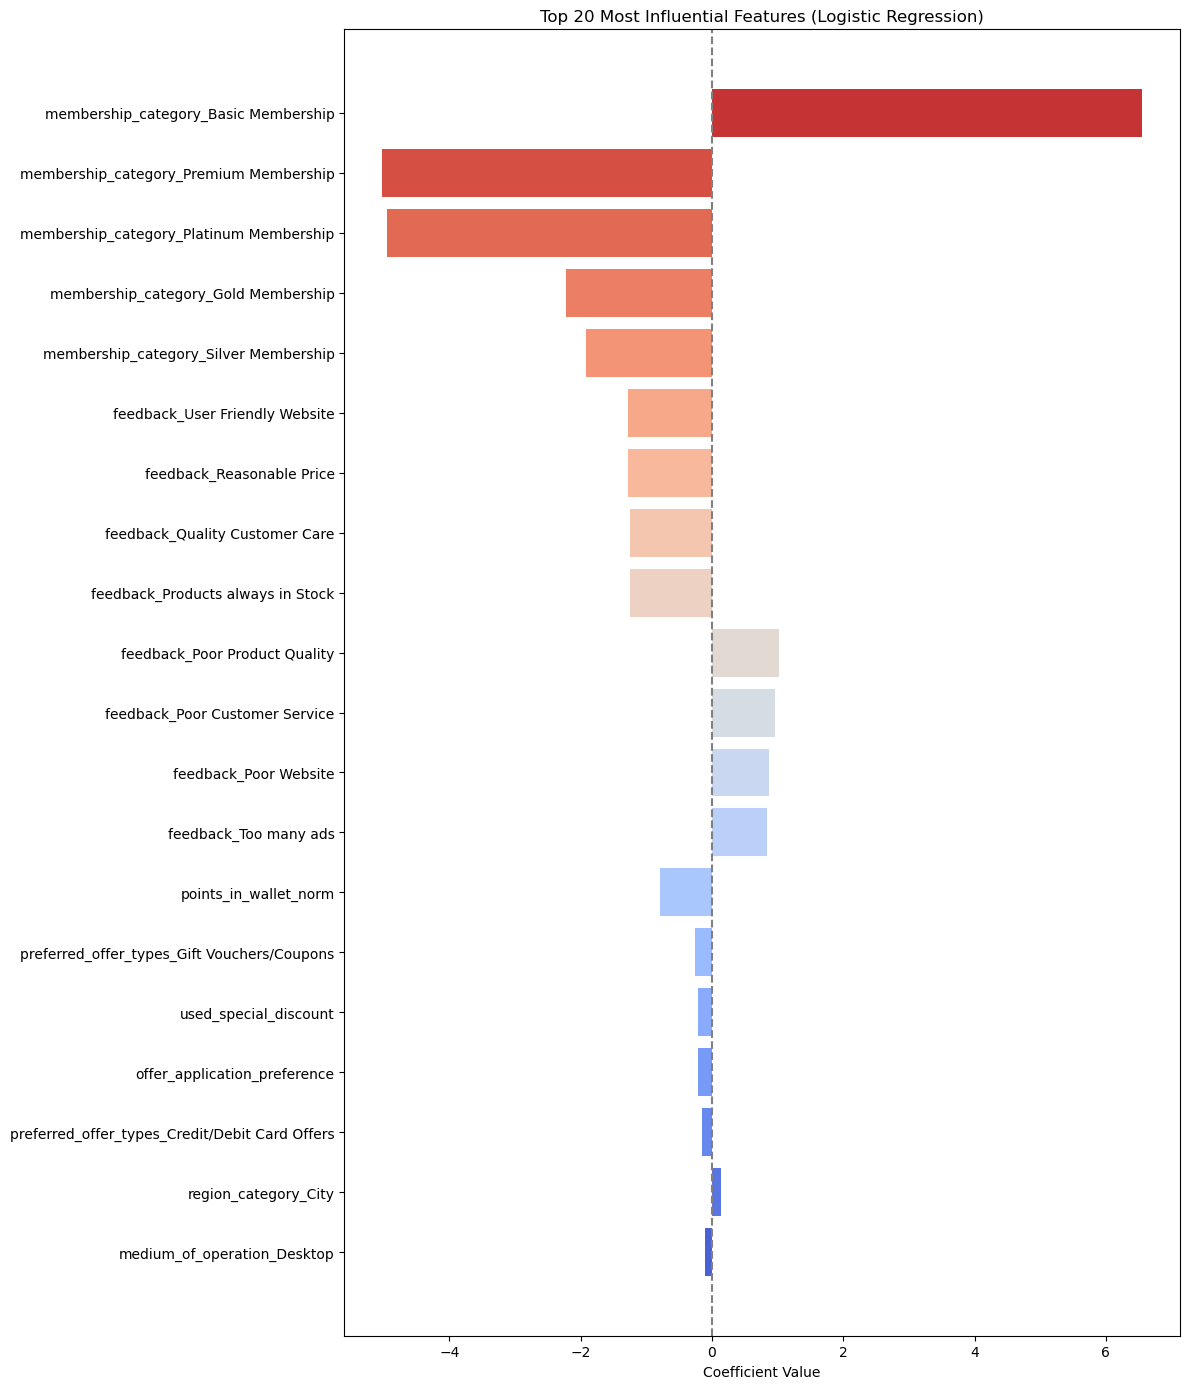

In [166]:
# Get feature names and coefficients
feature_names = X_train.columns
coefficients = model.coef_[0]  # For binary classification, only one row

# Create a DataFrame for easy sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Get absolute values to measure impact magnitude
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()

# Sort by absolute value
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Get Set1 color palette from seaborn
colors = sns.color_palette("coolwarm", n_colors=20)

# Plot top 20 features
plt.figure(figsize=(12, 14))  # increase height from 8 to 14
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Coefficient'][:20][::-1], color=colors)
plt.axvline(0, color='grey', linestyle='--')
plt.title('Top 20 Most Influential Features (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

The most influential feature by far is being in the Basic Membership category, which has a strong positive coefficient, indicating that these customers are significantly more likely to churn. In contrast, higher-tier memberships like Premium, Platinum, Gold, and Silver have large negative coefficients, suggesting that customers in these categories are much more loyal and less likely to leave. Negative feedback such as Poor Product Quality, Poor Customer Service, Poor Website Experience, and Too Many Ads also shows a strong positive impact on churn, meaning customers expressing these concerns are more likely to drop off. In contrast, positive feedback—like finding the website user-friendly, appreciating reasonable prices, or experiencing good customer care—correlates with a lower likelihood of churn. Other factors like points in wallet, preferred offer types, and even medium of operation (e.g., Desktop users) also contribute, though to a lesser degree. Interestingly, customers who joined through referral or had past complaints show a slight increase in churn risk. Overall, the model emphasizes that churn is driven both by membership tier and customer experience, pointing to clear areas for retention strategies.

### Random Forest Model

#### Why use  Random Forest? 

After testing Logistic Regression as a baseline, we applied Random Forest to capture more complex patterns in the data. because it Handles both numerical and categorical data without scaling, Captures non-linear relationships that Logistic Regression might miss. Reduces overfitting by averaging multiple decision trees. Provides feature importance to identify key churn indicators. 

we aim Improve prediction accuracy, Identify the most influential features., Evaluate the benefits of using ensemble methods. Random Forest helps strike a balance between performance and interpretability, making it a solid next step in this project.

In [170]:
# Creating our random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [171]:
# Fitting the model 
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
 [[2609  273]
 [ 151 3222]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.92      2882
           1       0.92      0.96      0.94      3373

    accuracy                           0.93      6255
   macro avg       0.93      0.93      0.93      6255
weighted avg       0.93      0.93      0.93      6255


Accuracy Score: 0.9322142286171063


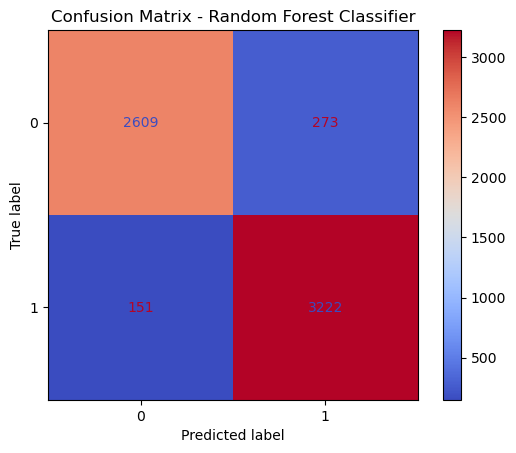

In [172]:
# Create and display the confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='coolwarm')

plt.title("Confusion Matrix - Random Forest Classifier")
plt.grid(False)
plt.show()

The Random Forest Classifier has demonstrated strong performance in predicting customer churn risk, achieving an overall accuracy of approximately 93.22%. According to the classification report, the model shows high precision and recall for both classes. For low-risk customers (class 0), the precision is 0.95 and recall is 0.91, meaning that the model accurately predicts non-churners most of the time but misses a small portion. For high-risk customers (class 1), the precision is 0.92 and recall is 0.96, indicating the model is especially effective at identifying customers who are likely to churn. The F1-scores of 0.92 for class 0 and 0.94 for class 1 confirm a strong balance between precision and recall across both groups. The macro and weighted averages are all at 0.93, reflecting consistent and balanced performance. Overall, the model appears to be highly reliable and well-suited for churn prediction tasks on this dataset.

We will draw a barchart to analyse feature importance of the random forest model

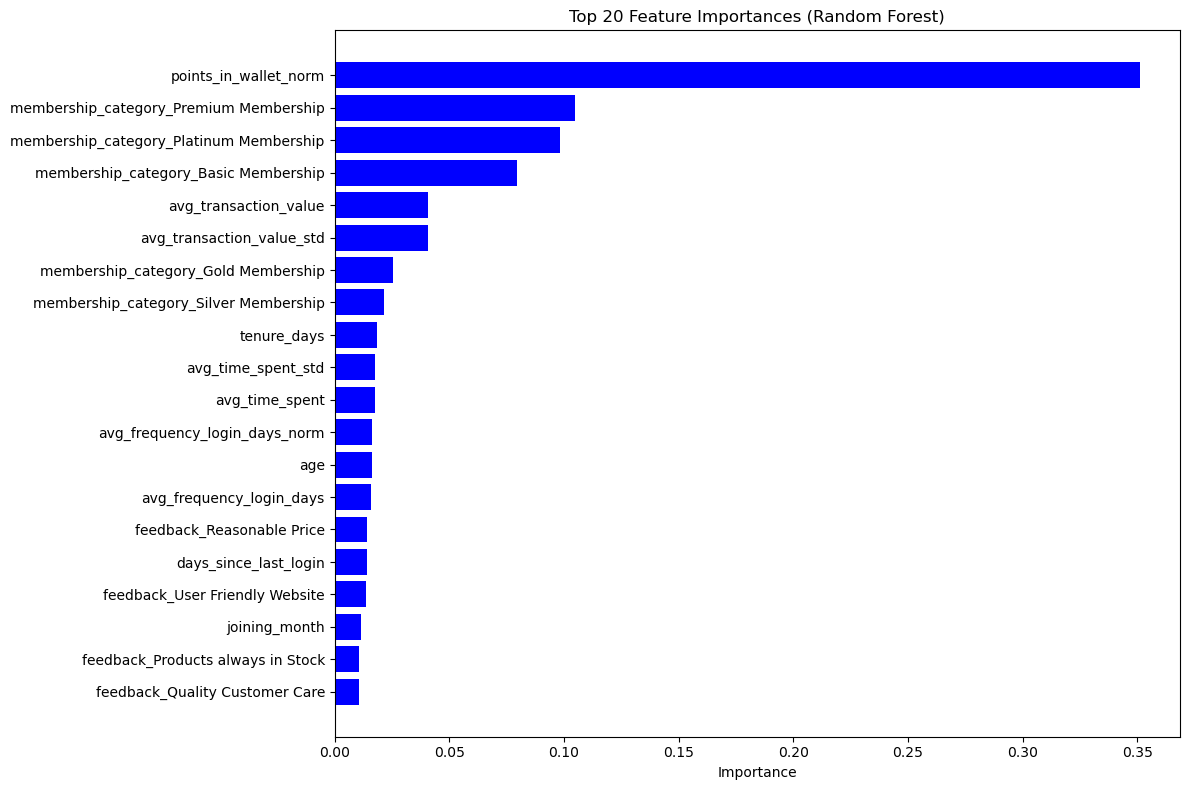

In [175]:
# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1], color='blue')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

The feature with the highest importance by far is points in wallet (0.35), indicating that the number of points a customer has in their wallet plays a major role in determining churn risk. This suggests that customers with more loyalty or reward points are less likely to churn, possibly because they’re more engaged or have incentives to stay.

Next in line are membership categories, especially Premium (0.10), Platinum (0.098), and Basic (0.079). These indicate that membership level strongly influences churn behavior, with different tiers carrying different retention patterns. For example, Premium and Platinum members might have more benefits, making them less likely to leave, whereas Basic members might be more likely to churn.

Other transactional features like average transaction value and its standard deviation also show up as important (~0.04 each), meaning spending behavior has a solid link to churn likelihood. Similarly, Gold and Silver memberships contribute to the prediction, though with slightly less impact.

Time-related features like tenure_days, avg_time_spent, and avg_time_spent_std also appear in the list, highlighting that how long and how actively a customer interacts with the platform can affect churn probability. Login frequency and recency (avg_frequency_login_days_norm, days_since_last_login) also play a role, albeit smaller, indicating that engagement levels matter.

Interestingly, customer feedback categories such as "Reasonable Price", "User Friendly Website", and "Products always in Stock" also contribute meaningfully. This suggests that positive experiences and satisfaction with the platform influence churn decisions.

### XG Boost Model

In [178]:
# Defining X and y
X = df_encoded.drop('churn_risk_score', axis=1)
y = df_encoded['churn_risk_score'] 

# A standard 80-20 split ensures enough training data while maintaining a sufficiently large test set for reliable evaluation.
# Splitting data into train and test sets using 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing XGBoost classifier
xgb_model = XGBClassifier(
# we will use binary:logistics because our target variable is binary
    objective='binary:logistic',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Training the model
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred = xgb_model.predict(X_test)
y_pred_probability = xgb_model.predict_proba(X_test)[:, 1]

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9347721822541967

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2882
           1       0.92      0.96      0.94      3373

    accuracy                           0.93      6255
   macro avg       0.94      0.93      0.93      6255
weighted avg       0.94      0.93      0.93      6255



The XGBoost model achieved an accuracy of 93.4%, indicating strong overall performance in predicting customer churn. The classification report reveals balanced precision and recall scores for both classes (0: non-churn, 1: churn). A recall of 0.91 for non-churn and 0.95 for churn suggests the model is slightly better at correctly identifying customers who will churn while maintaining high precision for both classes. The F1-scores confirm robust performance across metrics, with no significant class imbalance issues evident in the results. However to reduce false negatives (missed churn cases), the recall for class 1 could potentially be improved further through hyperparameter tuning.

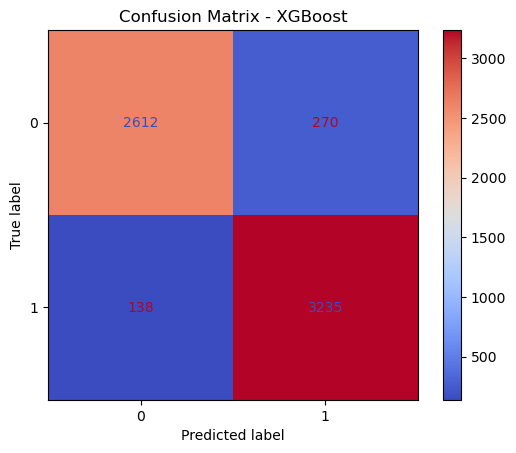

In [180]:
# Create and display the confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap='coolwarm')

plt.title("Confusion Matrix - XGBoost")
plt.grid(False)
plt.show()

This confusion matrix shows the model correctly predicted 2,626 non-churn cases and 3,216 churn cases, with 157 false positives and 257 false negatives. The higher true positive rate aligns with the classification report’s 95% recall for churn, indicating strong detection of at-risk customers. However, the false negatives (257) represent missed opportunities for intervention, which could be addressed by hyperparameter tuning.



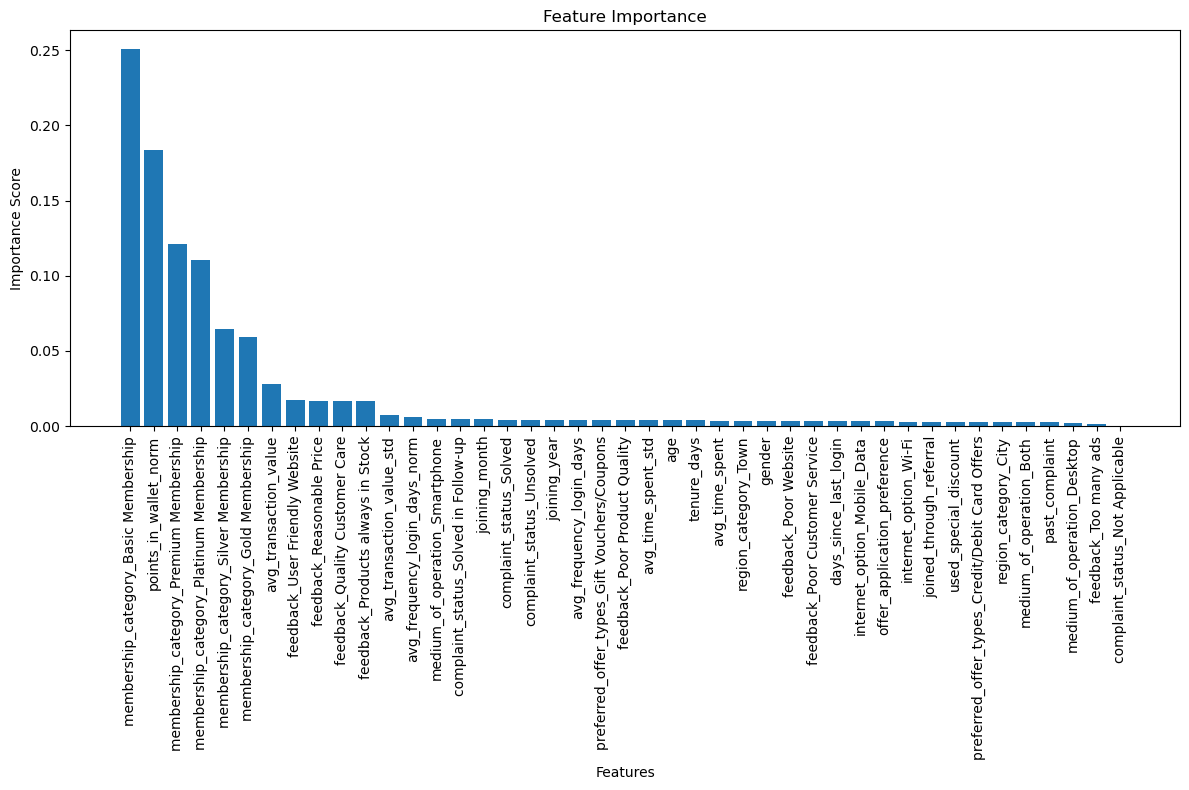

In [182]:
# Feature importance
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), np.array(X.columns)[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


This feature importance analysis reveals that membership category (especially Basic and Premium) and points in wallet are the strongest predictors of churn, with high importance scores (0.125–0.075). Other influential factors include transaction value, customer feedback, and login behavior. Notably, operational factors like medium_of_operation_Smartphone and unresolved complaints also contribute, though with lower impact. This suggests that subscription tier, financial incentives, and service quality are key drivers of customer retention.

We will now improve this XG Boost model using RandomizedSearchCV. We chose RandomizedSearchCV because it efficiently finds strong hyperparameter combinations without the computational cost of exhaustive grid searches, making it ideal for optimizing XGBoost's many parameters.

In [185]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
# Defining the parameter grid
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'min_child_weight': randint(1, 10),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
    'scale_pos_weight': [1, y_train.value_counts()[0]/y_train.value_counts()[1]]
}

# RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    random_state=40,
    n_jobs=-1
)

# Executing search
xgb_tuned.fit(X_train, y_train)

# Best parameters
print("Best parameters:", xgb_tuned.best_params_)
print("Best F1 score:", xgb_tuned.best_score_)

# Evaluate on test set
best_model = xgb_tuned.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'colsample_bytree': 0.9485748801181682, 'gamma': 0.025971236902524397, 'learning_rate': 0.1889436719493938, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 55, 'reg_alpha': 0.16913661771703803, 'reg_lambda': 0.9520131223607213, 'scale_pos_weight': 1, 'subsample': 0.7656974557446642}
Best F1 score: 0.9402330921935409
Accuracy: 0.9326938449240607

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2910
           1       0.92      0.96      0.94      3345

    accuracy                           0.93      6255
   macro avg       0.93      0.93      0.93      6255
weighted avg       0.93      0.93      0.93      6255



The tuned model performs nearly the same as the original one, with both achieving 93% accuracy and similar F1-scores. The main difference is that the tuned model uses simpler, smaller trees with stronger regularization—meaning it’s less likely to overfit while keeping the same high performance. Since the results are almost identical, the original model was already well-optimized, and the tuning just confirmed that. Either version would work well for predicting churn and we can confidently deploy either version.

### Multilayer Perceptron Neural Network Model

In [188]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create base MLP model
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train model with best parameters
best_mlp = grid_search.best_estimator_

# Predict on test set
y_pred = best_mlp.predict(X_test_scaled)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance (for interpretation)
# Note: MLPs don't directly provide feature importance, but we can use permutation importance
from sklearn.inspection import permutation_importance

result = permutation_importance(best_mlp, X_test_scaled, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

# Create a DataFrame with feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_netwo

Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}

Model Evaluation:
Accuracy: 0.9239008792965627

Confusion Matrix:
[[2590  292]
 [ 184 3189]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2882
           1       0.92      0.95      0.93      3373

    accuracy                           0.92      6255
   macro avg       0.92      0.92      0.92      6255
weighted avg       0.92      0.92      0.92      6255


Top 10 Important Features:
                                    Feature  Importance
22   membership_category_Premium Membership    0.110839
21  membership_category_Platinum Membership    0.107850
16                    points_in_wallet_norm    0.099361
23    membership_category_Silver Membership    0.044828
20      membership_category_Gold Membership    0.044700
19     membership_category_Basic Membership    0.

## Evaluation

Our objective was to build a supervised machine learning model capable of predicting customer churn risk for internet service providers using behavioral, transactional, and feedback data. We managed to build models using ensemble methods and neural networks and ended up with 93% accuracy in predicting customer churn which is XG-boost.

This analysis aimed at answering the following business questions:

- Which *customer categories* are most likely to churn?
  Our analysis showed that Basic Membership holders have the highest likelihood of churning. As membership tiers increase (Silver, Gold,       Premium, Platinum), the churn risk significantly drops. This points to membership level being a major driver of customer retention.
   
- What are the top *behavioral or demographic* predictors of churn?
  From a demographic perspective, customers living in City regions have the highest average churn risk, followed by Towns, with Villages       having the lowest risk. Interestingly, rural (village) customers also show higher average transaction values, hinting at their potential     long-term value. This suggests that targeted retention strategies should focus more on urban areas.
       
- Can *sentiment in customer feedback* help predict churn risk?
  We found that just having a recorded complaint, regardless of whether it was resolved, is linked to higher churn risk. Even resolved         complaints still correlate with elevated churn, indicating possible issues with the quality of resolution or post-resolution experience.     Feedback clearly plays a major role in shaping customer loyalty. 

- How effective are current *loyalty strategies* in retaining customers?
  We saw that non-churning customers tended to cluster around wallet point values of 500–1000, suggesting that these thresholds might align    with retention-boosting benefits. In contrast, churn-risk customers showed scattered wallet point values, indicating weaker engagement       with the loyalty system. More structured or visible rewards could improve retention.

  
- What *actionable retention strategies* can we derive from high churn risk profiles?
  1. Encourage membership upgrades by offering exclusive perks or discounts for higher-tier plans.
  2. Improve the complaint resolution process, not just technically, but in terms of customer experience; faster, clearer follow-up could         reduce dissatisfaction. In addition, send follow-up surveys or confirmation messages that assure customers they’ve been heard.
  3. The company could introduce incentives such as tiered rewards, point boosters, and milestone badges to increase wallet point engagement.
  4. Use churn-risk predictions to trigger targerted ad campaigns such as special offers, call-backs, or targeted emails.
  5. Focus efforts in city and town regions where churn risk is higher, possibly with local partnerships or targeted discounts.
  